# Large Network Problems

Here I am just demonstrating the issue I am having with larger networks, if you haven't taken a look at the `Tri_to_bistability_findings.ipynb` notebook, I highly suggest it. The only difference with this network from the fully connected ACDC network I was using in the above notebook is that I added a self loop to Hb. 

In [1]:
import DSGRN
from DSGRN import *

import sys
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from NFixedPointQuery import *
from MGsearchthroughPG import *
from NsearchgoeQuery import *

In [2]:
import sys 
sys.setrecursionlimit(10**8) 

In [3]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_R2009E.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_R2009E")

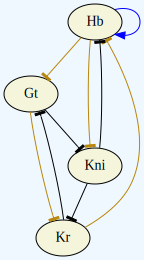

In [4]:
DrawGraph(network)

In [5]:
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

6289248


When I do a search with only two different fixed point sets, the code works fine! It does take a bit longer on this network then it did before I added in the self loop to Hb, but it still takes less than 15 seconds to run.

In [6]:
b2200 = {"Hb":[2,3], "Gt":2, "Kr":0, "Kni":0}
b2020 = {"Hb":[2,3], "Gt":0, "Kr":2, "Kni":0}
b0020 = {"Hb":0, "Gt":1, "Kr":2, "Kni":1}

b2000 = {"Hb":0, "Gt":1, "Kr":2, "Kni":1}
bb2020 = {"Hb":[2,3], "Gt":0, "Kr":2, "Kni":0}

In [7]:
D = [[b2200, b2020, b0020], [b2000, bb2020]]
M = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-07 10:17:52.156055:
MatchQuery({'Hb': [2, 3], 'Gt': 2, 'Kr': 0, 'Kni': 0}, Matches0)
2020-08-07 10:17:52.158760:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%'", "Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 10:17:52.160199:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%';
2020-08-07 10:17:52.189401:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 2, _, _%';
2020-08-07 10:17:52.194686:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 10:17:52.196899:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 10:17:52.198497:
MatchQuery :: constructed
2020-08-07 10:17:52.200058:
MatchQu

2020-08-07 10:17:52.856778:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 10:17:52.857854:
MatchQuery :: constructed
2020-08-07 10:17:52.859037:
MatchQuery({'Hb': [2, 3], 'Gt': 0, 'Kr': 2, 'Kni': 0}, Matches1)
2020-08-07 10:17:52.859303:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 10:17:52.859568:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%';
2020-08-07 10:17:52.868756:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-07 10:17:52.872711:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-07 10:17:52.874423:
MatchQu

In [8]:
M

[[432161, 432160, 432132],
 [432161, 432160, 433434],
 [1088765, 1088737],
 [608364, 608336],
 [1148540, 1148512],
 [492141, 492113],
 [431769, 431741],
 [1206855, 1207345],
 [610816, 610788],
 [1148545, 1148517],
 [432554, 432526],
 [549667, 549639],
 [372483, 372455],
 [1268006, 1267978],
 [1087589, 1087561],
 [1385704, 1385676],
 [1086999, 1086971],
 [1325626, 1325598],
 [1148445, 1148417],
 [427359, 427331],
 [1266047, 1266019],
 [1148151, 1148123],
 [610815, 611795],
 [1146778, 1146750],
 [1147954, 1148934],
 [429317, 429289],
 [432063, 433337],
 [549666, 549638],
 [1148151, 1149425],
 [1385116, 1385088],
 [429121, 429093],
 [1327588, 1327560],
 [611111, 611083],
 [1387175, 1387147],
 [1146781, 1147369],
 [1148148, 1149422],
 [432061, 432033],
 [372875, 372847],
 [429415, 429387],
 [1327196, 1328470],
 [670794, 670766],
 [1327101, 1328375],
 [1088863, 1090137],
 [606306, 606278],
 [1087099, 1087687],
 [1387369, 1388643],
 [670597, 670569],
 [1385115, 1385087],
 [608169, 608141],
 

However, when I try to do a search with three different fixed point sets the code runs for  a long time. If I manually stop it, then it is always stopped in the `twolistpath()` function (this function is in `funforMGpaths.py`). If I do not manually stop it and just let it run for awhile, it just seams stuck. 

In [9]:
D = [[b2200, b2020, b0020], [b2200, b2020], [b2000, bb2020]]
M = MGsearchthroughPG(database,'=', '=', D).allpaths()

2020-08-07 10:18:39.554817:
MatchQuery({'Hb': [2, 3], 'Gt': 2, 'Kr': 0, 'Kni': 0}, Matches0)
2020-08-07 10:18:39.557109:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%'", "Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 10:18:39.558423:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%';
2020-08-07 10:18:39.583780:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 2, _, _%';
2020-08-07 10:18:39.590652:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 10:18:39.592874:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 10:18:39.594357:
MatchQuery :: constructed
2020-08-07 10:18:39.595835:
MatchQu

2020-08-07 10:18:40.277688:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 10:18:40.279003:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 10:18:40.280106:
MatchQuery :: constructed
2020-08-07 10:18:40.281297:
MatchQuery({'Hb': [2, 3], 'Gt': 0, 'Kr': 2, 'Kni': 0}, Matches1)
2020-08-07 10:18:40.281566:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 10:18:40.281835:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%';
2020-08-07 10:18:40.291444:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-07 10:18:40.295283:
MatchQu

2020-08-07 10:18:46.544179:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%';
2020-08-07 10:18:46.553428:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 2, _, _%';
2020-08-07 10:18:46.556762:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-07 10:18:46.558130:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-07 10:18:46.559212:
MatchQuery :: constructed
2020-08-07 10:18:46.560408:
MatchQuery({'Hb': [2, 3], 'Gt': 0, 'Kr': 2, 'Kni': 0}, Matches1)
2020-08-07 10:18:46.560672:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%' or Label like 'FP { 3, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-07 10:18:46.561011:
MatchQu

KeyboardInterrupt: 